## Image Segmentation

     Grouping or segmenting of images into distinct parts is known as Image Segmentation.
     
From Computer Vision - part I, we have seen techniques were we are extracting or detecting features likes edges, corners and such features. And now, we'll apply these smaller concepts to solve broader problem. For instance, self driving cars requires cars to detect traffic lights, lanes, human etc in one frame of image i.e. it has to segment object individually. So, let's start with Part II of Computer vision.

Image Contouring is a way to segment image, generally the edge detection is used to detect the edges of the object, which is nothing but drastic change in pixel values between bunch of pixels but there will be many incomplete edges on the objects. So for image segmentation we require complete edges around the object.

So image contours are continuous curves that follow edges along the boundary. It provides information about the shape of the object and works well when we have white object against black background.

http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_table_of_contents_contours/py_table_of_contents_contours.html

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

%matplotlib inline

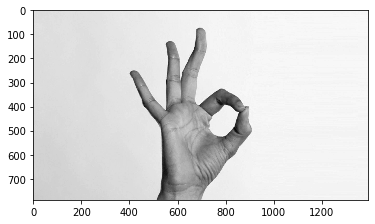

In [3]:
image = cv2.imread("/Users/mayurjain/Desktop/hand.jpg")
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray,cmap='gray')

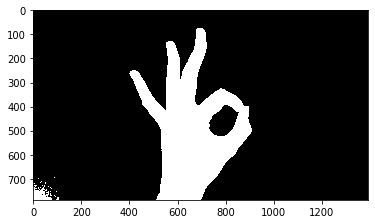

In [19]:
# Creating Binary Threshold for the image

retval, binary = cv2.threshold(image_gray,201,255,cv2.THRESH_BINARY_INV)

plt.imshow(binary,cmap='gray')

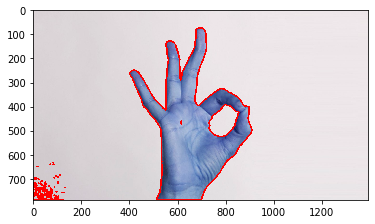

In [20]:
# Finding contours from threshold binary image

contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

all_contours = cv2.drawContours(image, contours, -1, (255,0,0), 5)
plt.imshow(all_contours)

Interesting thing to note, Once the contour is drawn over the object, we can calculate number of things about the object i.e. area, perimeter, center etc, all these shape traits are called contour features.

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html

Kmeans Clustering is widely used in image segmentation. KMeans is unsupervisied machine learning algorithm and here KMeans will cluster the image based on the pixel value i.e. a few random centroid pixel value is taken for the image and based on the centroid value, the pixels will get pulled to the nearest centroids. And mean calculation is done between pixel and centroid, then new centroid is decided. The process repeats itself untill the convergence happens, and each color is segmented and cluster centroid is at the center of the cluster.

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html

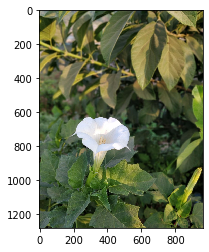

In [23]:
img = cv2.imread("/Users/mayurjain/Desktop/flower.jpg")
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(img_rgb,cmap='gray')

In [24]:
#Preparing data for opencv kmeans

# converting to 2d array of pixels and 3 color channel
pixel_val = img_rgb.reshape((-1,3))
pixel_val = np.float32(pixel_val)


In [29]:
# Stopping criteria for kmeans clustering

criteria = (cv2.TermCriteria_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k=3
retval, labels, centers = cv2.kmeans(pixel_val,k,None,criteria,10, cv2.KMEANS_RANDOM_CENTERS)

#convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

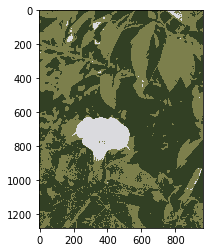

In [30]:
# Reshape back to original image
segmented_img = segmented_data.reshape((img.shape))
label_reshape = labels.reshape(img.shape[0],img.shape[1])

plt.imshow(segmented_img)

Now, since i have mentioned the value of k as 3, i found 3 cluster of colors. We can try other values.

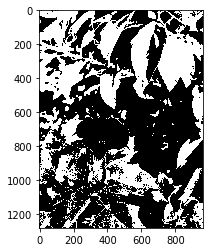

In [37]:
# Visualize one segment

#label_reshape value highlights the cluster alone and blocks out other cluster points by making it black.

plt.imshow(label_reshape==2,cmap='gray')

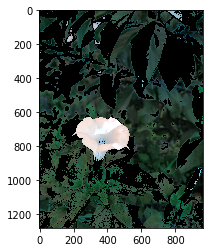

In [39]:
# Masking the region if required

img_copy = np.copy(img)
img_copy[label_reshape==2] = [0,0,0]

plt.imshow(img_copy)

## Image Features

A object in a image has n number of features, which will help us in identifying the object. Here, we'll find those n different features of the image, and group them into a vector of feature of that particular object. And this vector can help us find similar object in other image as well.

ORB Algorithm is used to create feature vector of an image.

ORB Agorithm:

    * Find the keypoints in the image, which is done by FAST Algorithm (Features from Accelerated Segments Test).   Fast quickly compares the brightness levels in a given pixel area, and if a threshold of brightness or darkness is exceeded by the neighbouring pixel then such point is termed as keypoint. The keypoints give us about the location of object defining edges in an image.
    
    * Next, ORB uses BRIEF algorithm to convert these keypoints into feature vector, which helps in identifying the object in the image.
    
    * BRIEF - Binary Robust Independent Elementary Features, it creates binary feature vector from the keypoints. Since the feature vectors are 1's and 0's, it can stored efficiently and computed quickly.
    
        * Brief creates binary descriptors for keypoint, it first smoothing the given image with gaussian kernel to prevent the descriptor from being too sensitive to high frequency noise.
        
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_brief/py_brief.html
    

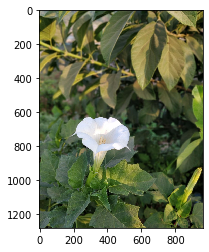

In [3]:
# Creating Image Pyramids

# Read in the image
image = cv2.imread('/Users/mayurjain/Desktop/flower.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

(0, 1280)

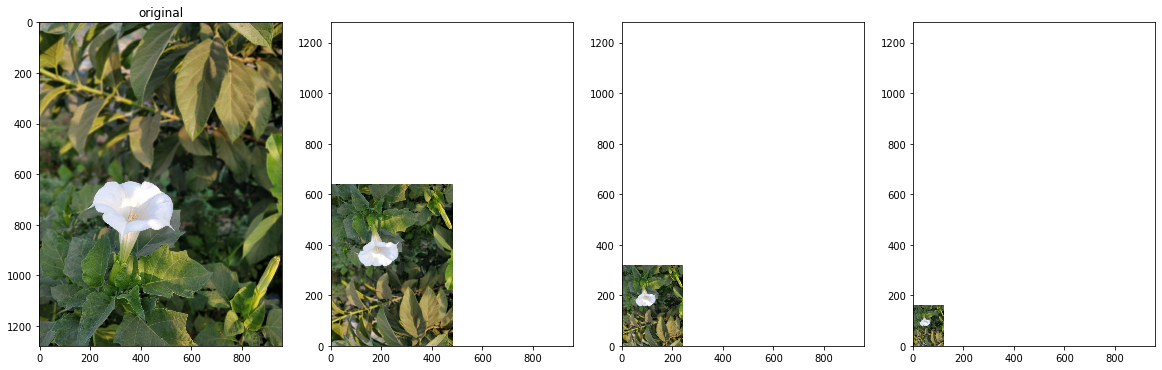

In [4]:
#Take a look at how downsampling with image pyramids works.

level_1 = cv2.pyrDown(image)
level_2 = cv2.pyrDown(level_1)
level_3 = cv2.pyrDown(level_2)

# Display the images
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original')
ax1.imshow(image)

ax2.imshow(level_1)
ax2.set_xlim([0, image.shape[1]])
ax2.set_ylim([0, image.shape[0]])

ax3.imshow(level_2)
ax3.set_xlim([0, image.shape[1]])
ax3.set_ylim([0, image.shape[0]])

ax4.imshow(level_3)
ax4.set_xlim([0, image.shape[1]])
ax4.set_ylim([0, image.shape[0]])

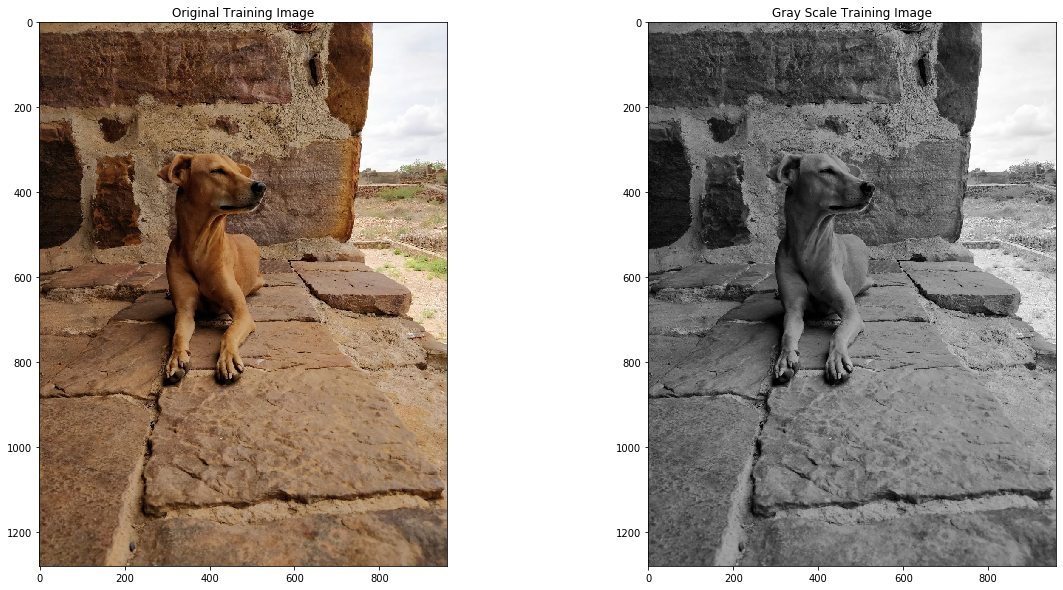

In [5]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [20,10]

# Load the training image
image = cv2.imread("/Users/mayurjain/Desktop/dog.jpg")

# Convert the training image to RGB
training_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the training image to gray Scale
training_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the images
plt.subplot(121)
plt.title('Original Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Gray Scale Training Image')
plt.imshow(training_gray, cmap = 'gray')
plt.show()

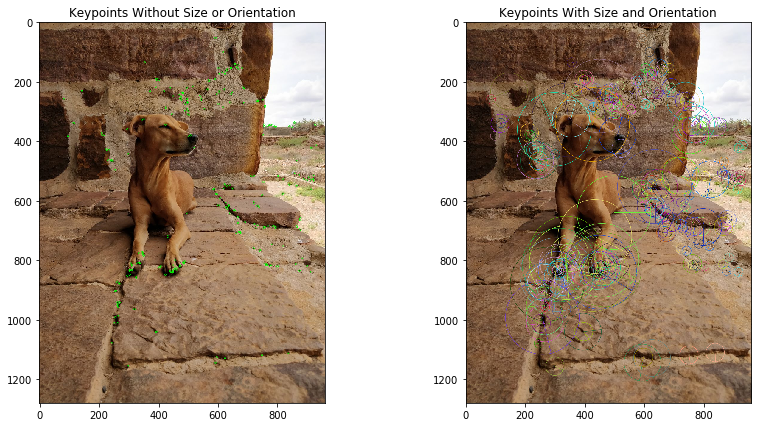


Number of keypoints Detected:  283


In [7]:
# Import copy to make copies of the training image


# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(300, 2.0)

# Find the keypoints in the gray scale training image and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask.
keypoints, descriptor = orb.detectAndCompute(training_gray, None)

# Create copies of the training image to draw our keypoints on
keyp_without_size = copy.copy(training_image)
keyp_with_size = copy.copy(training_image)

# Draw the keypoints without size or orientation on one copy of the training image 
cv2.drawKeypoints(training_image, keypoints, keyp_without_size, color = (0, 255, 0))

# Draw the keypoints with size and orientation on the other copy of the training image
cv2.drawKeypoints(training_image, keypoints, keyp_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with the keypoints without size or orientation
plt.subplot(121)
plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)

# Display the image with the keypoints with size and orientation
plt.subplot(122)
plt.title('Keypoints With Size and Orientation')
plt.imshow(keyp_with_size)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints))

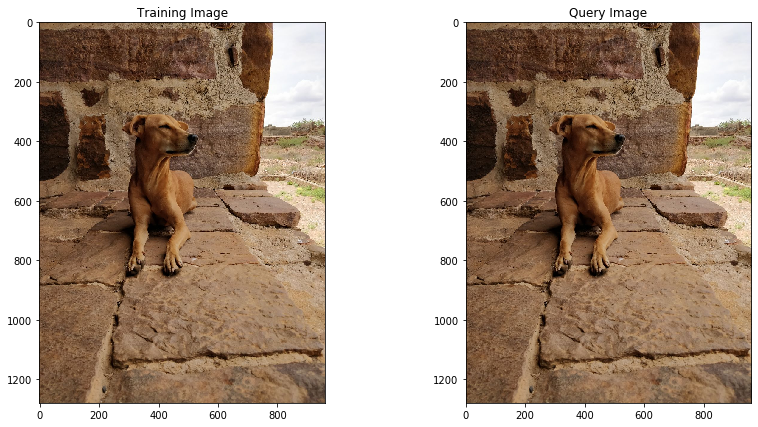

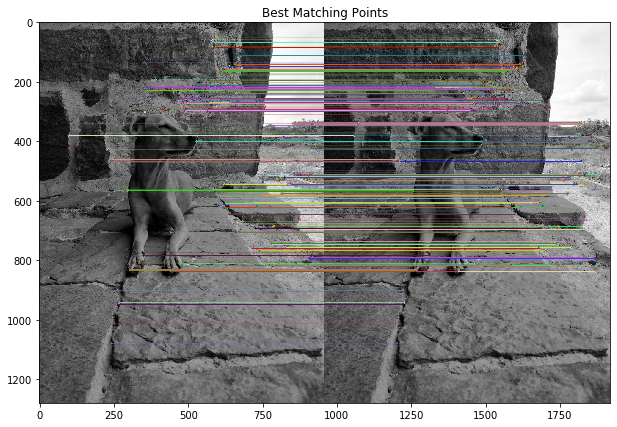

Number of Keypoints Detected In The Training Image:  941
Number of Keypoints Detected In The Query Image:  941

Number of Matching Keypoints Between The Training and Query Images:  941


In [4]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Load the training image
image1 = cv2.imread('/Users/mayurjain/Desktop/dog.jpg')

# Load the query image
image2 = cv2.imread('/Users/mayurjain/Desktop/dog.jpg')
#image2 = cv2.imread('/Users/mayurjain/Desktop/dog_2.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the training and query images
plt.subplot(121)
plt.title('Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Query Image')
plt.imshow(query_image)
plt.show()

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)

# Convert the query image to gray scale
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(1000, 2.0)

# Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask in either case.
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

# Create a Brute Force Matcher object. Set crossCheck to True so that the BFMatcher will only return consistent
# pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query image
matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want. So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 300 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:300], query_gray, flags = 2)

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

Scale Invariance property of the orb. This means that it is able to detect objects in images regardless of their size. To see this, we will now use our Brute-Force matcher to match points between the training image and a query image that is a ¼ the size of the original training image.

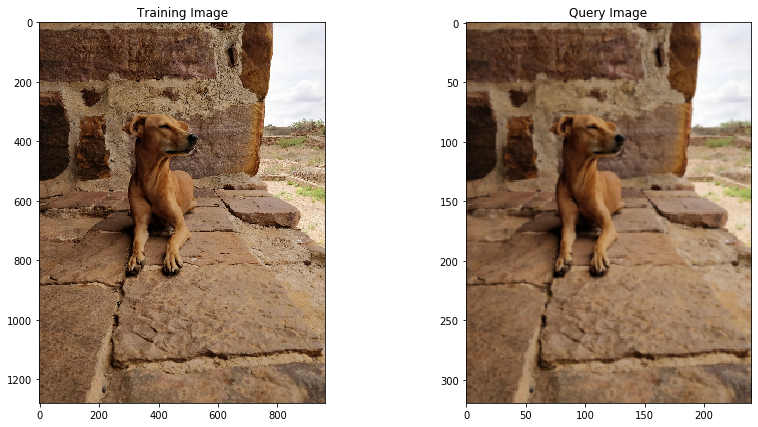

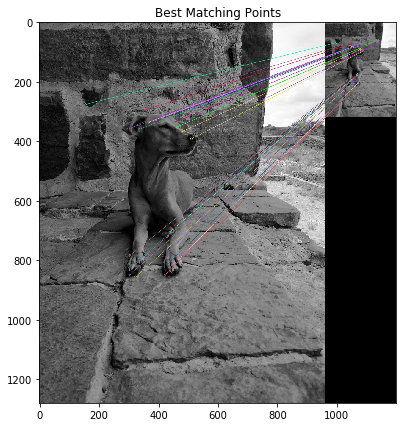


The Training Image has shape: (1280, 960)
The Query Image has shape: (320, 240)

Number of Keypoints Detected In The Training Image:  941
Number of Keypoints Detected In The Query Image:  629

Number of Matching Keypoints Between The Training and Query Images:  288


In [7]:
#Take a look at how downsampling with image pyramids works.

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Load the training image
image1 = cv2.imread('/Users/mayurjain/Desktop/dog.jpg')

# Load the query image
image2 = cv2.imread('/Users/mayurjain/Desktop/dog.jpg')
level_1 = cv2.pyrDown(image2)
level_2 = cv2.pyrDown(level_1)
level_3 = cv2.pyrDown(level_2)

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
query_image = cv2.cvtColor(level_2, cv2.COLOR_BGR2RGB)

# Display the images
plt.subplot(121)
plt.title('Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Query Image')
plt.imshow(query_image)
plt.show()

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)

# Convert the query image to gray scale
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(1000, 2.0)

# Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask in either case.
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

# Create a Brute Force Matcher object. Set crossCheck to True so that the BFMatcher will only return consistent
# pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query image
matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want. So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 30 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:30], query_gray, flags = 2)

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print the shape of the training image
print('\nThe Training Image has shape:', training_gray.shape)

#Print the shape of the query image
print('The Query Image has shape:', query_gray.shape)

# Print the number of keypoints detected in the training image
print("\nNumber of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

**As shown above, how ORB is able to detect the keypoints and match it across the original and scaled down image. We can also do the same even the image is rotated or illuminated or noise is added to it.**

https://github.com/udacity/CVND_Exercises/blob/master/1_4_Feature_Vectors/2.%20ORB.ipynb

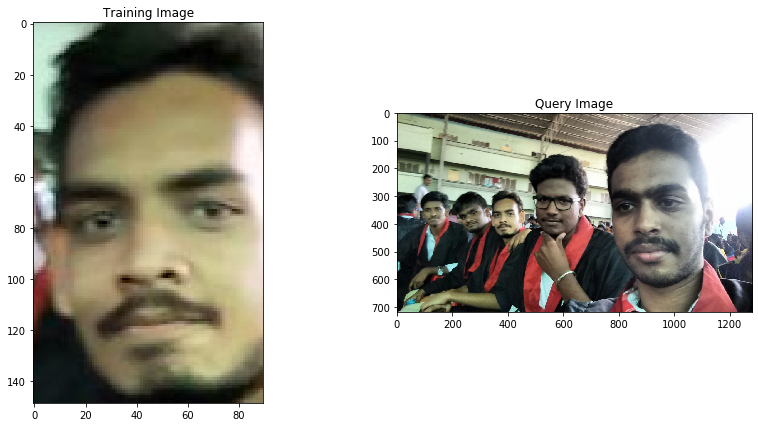

In [4]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Load the training image
image1 = cv2.imread('/Users/mayurjain/Desktop/cv_images/myface.png')

# Load the query image
image2 = cv2.imread('/Users/mayurjain/Desktop/cv_images/team.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the images
plt.subplot(121)
plt.imshow(training_image)
plt.title('Training Image')
plt.subplot(122)
plt.imshow(query_image)
plt.title('Query Image')
plt.show()

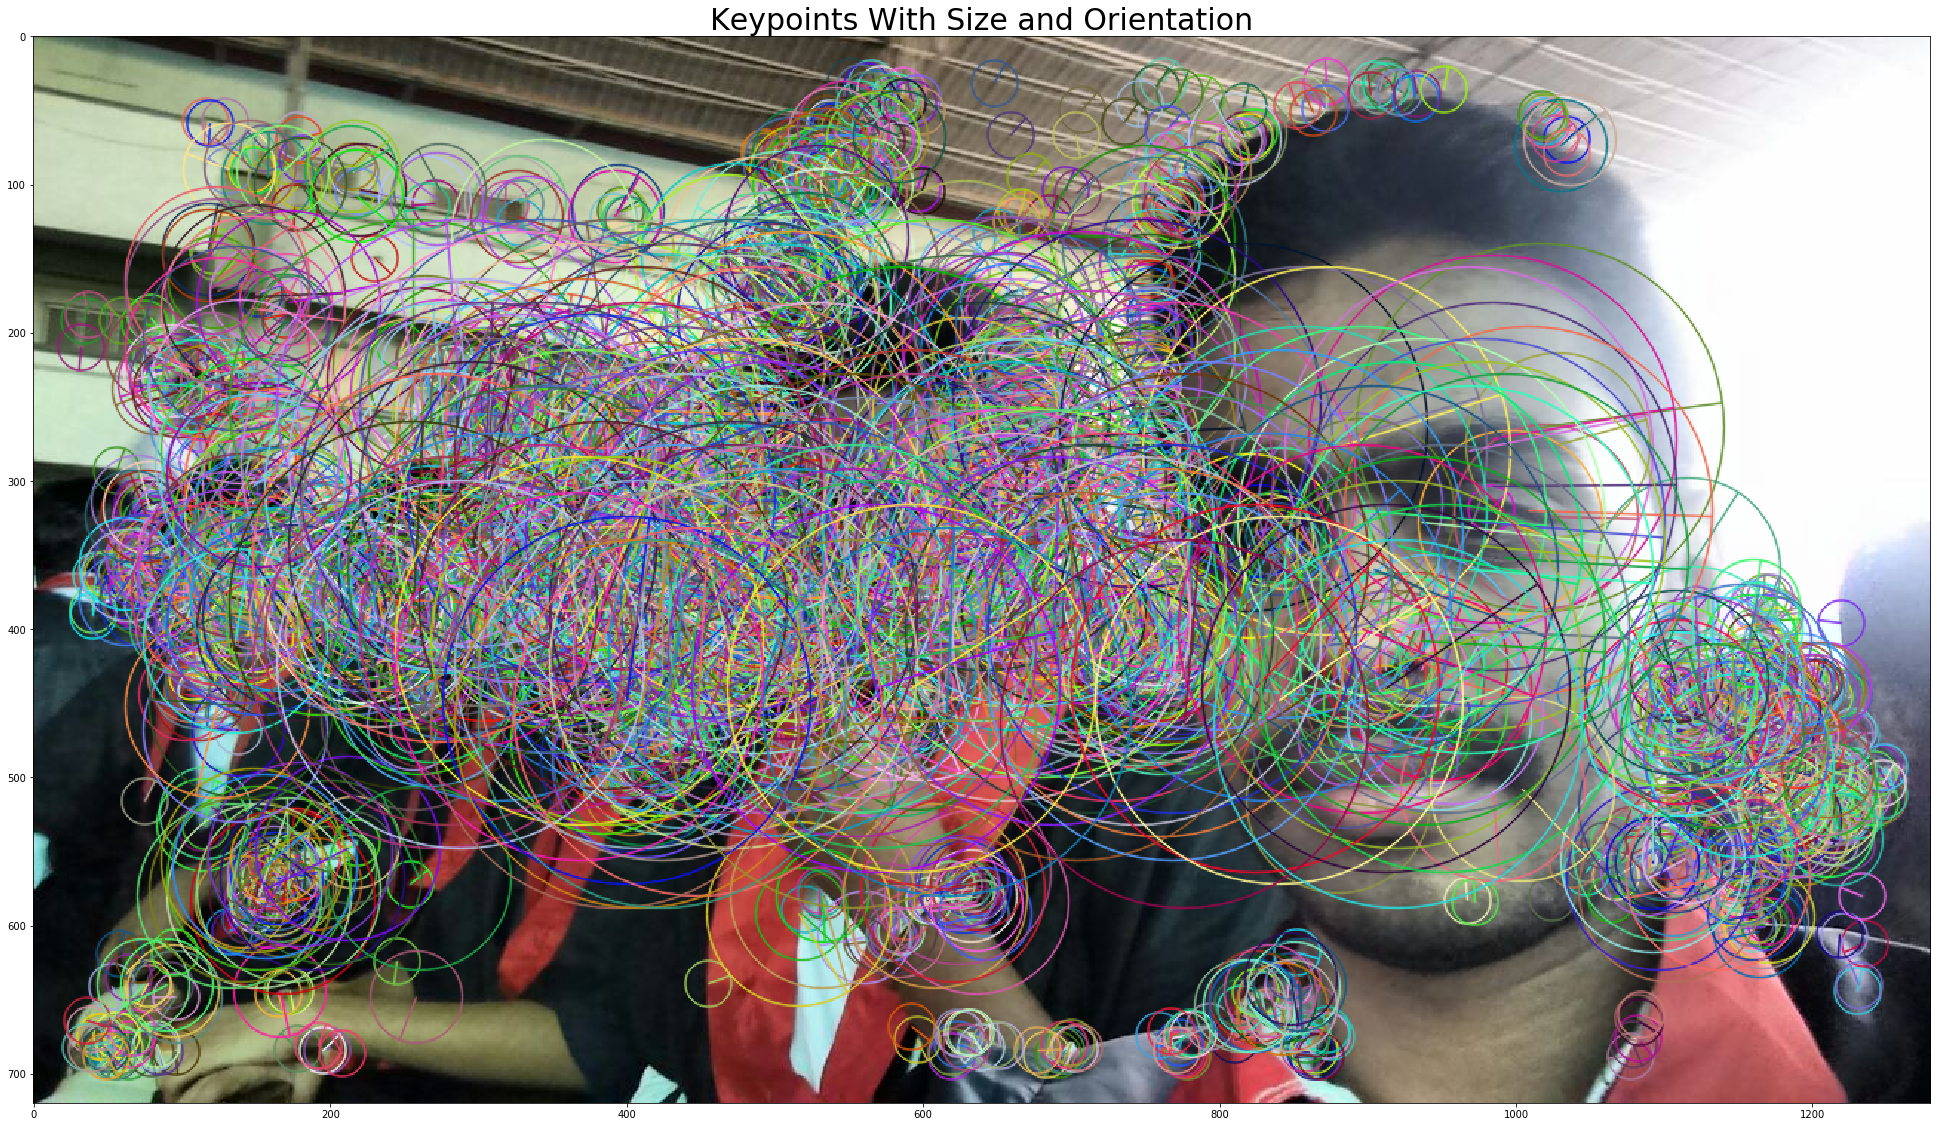


Number of keypoints Detected:  2776


In [9]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [34.0, 34.0]

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)

# Convert the query image to gray scale
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(3000, 2.0)

# Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask in either case.  
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

# Create copies of the query images to draw our keypoints on
query_img_keyp = copy.copy(query_image)

# Draw the keypoints with size and orientation on the copy of the query image
cv2.drawKeypoints(query_image, keypoints_query, query_img_keyp, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the query image with the keypoints with size and orientation
plt.title('Keypoints With Size and Orientation', fontsize = 30)
plt.imshow(query_img_keyp)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints_query))

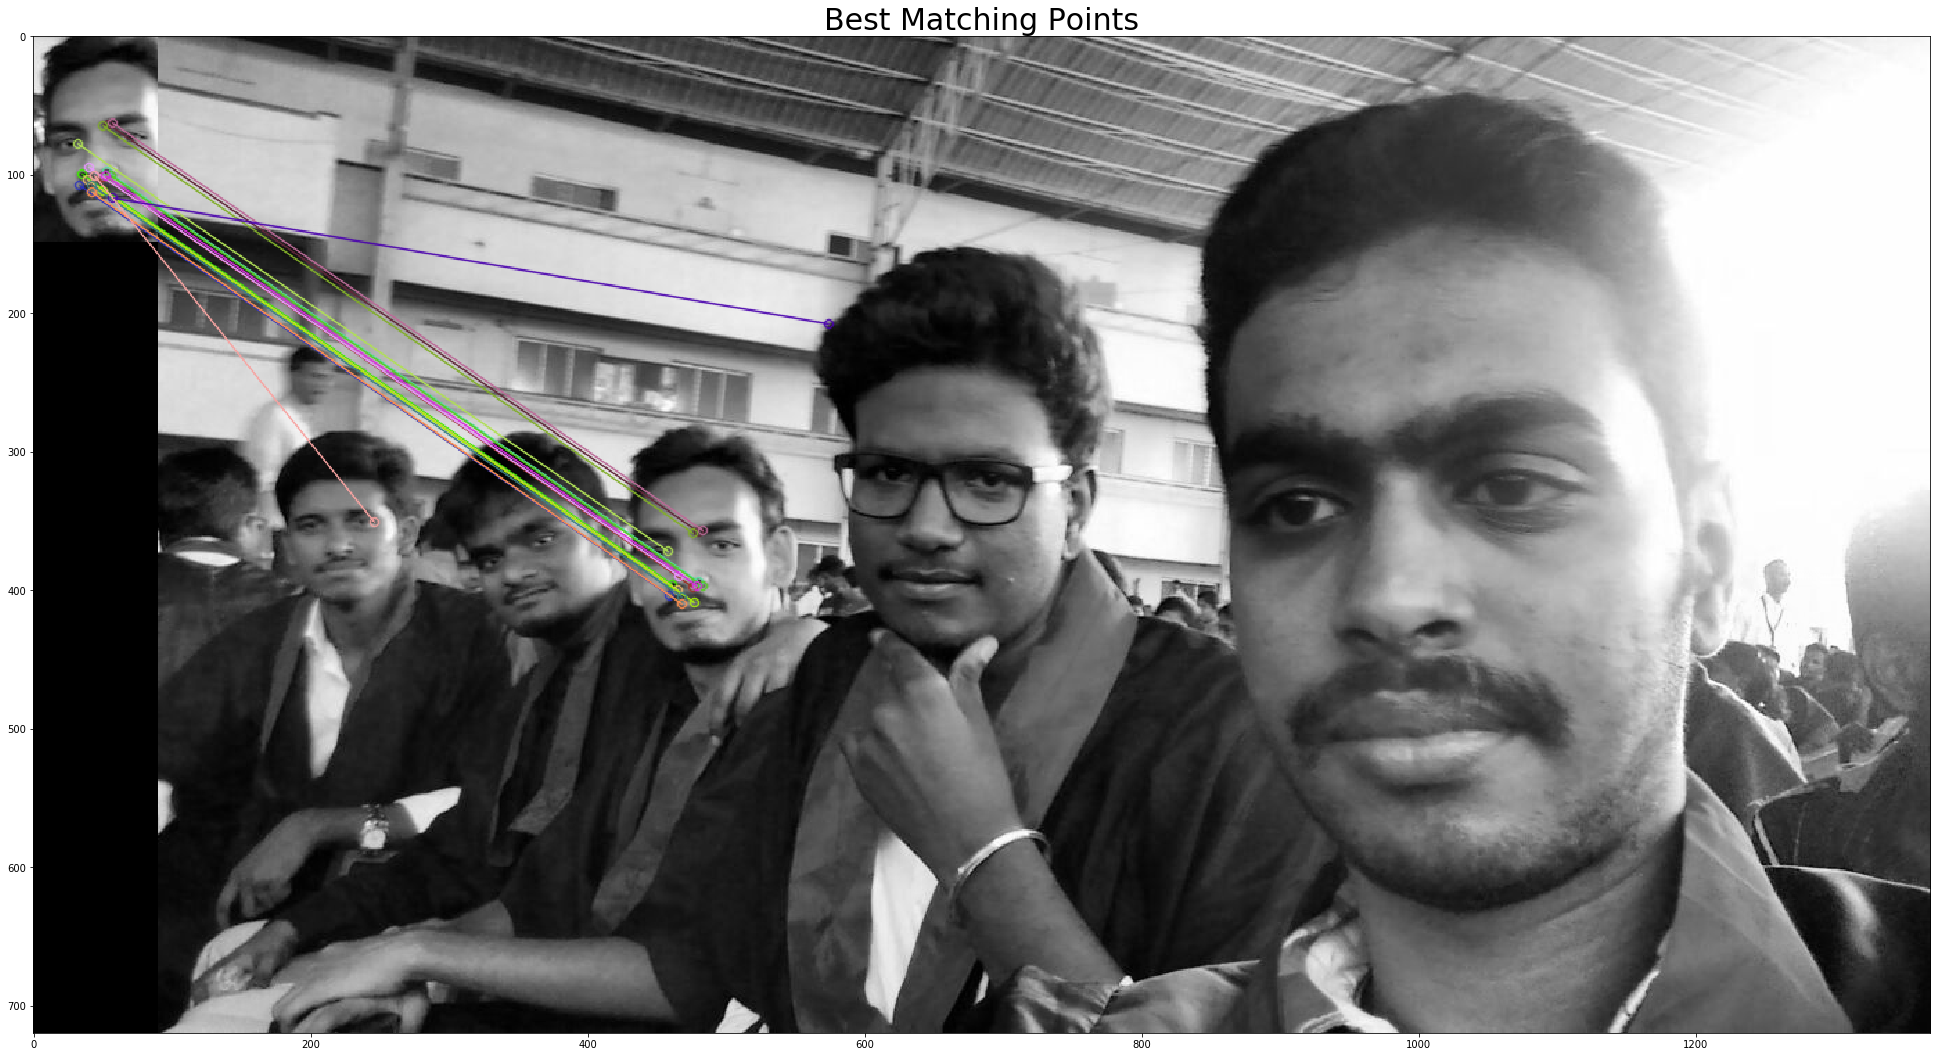

Number of Keypoints Detected In The Training Image:  19
Number of Keypoints Detected In The Query Image:  2776

Number of Matching Keypoints Between The Training and Query Images:  17


In [10]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [34.0, 34.0]

# Create a Brute Force Matcher object. We set crossCheck to True so that the BFMatcher will only return consistent
# pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query image
matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want. So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 85 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:85], query_gray, flags = 2)

# we display the image
plt.title('Best Matching Points', fontsize = 30)
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching Keypoints between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

## HOG - Histogram of Oriented Gradients

HOG algorithm works by creating histograms of the distribution of gradient orientations in an image and then normalizing them in a very special way. This special normalization is what makes HOG so effective at detecting the edges of objects even in cases where the contrast is very low. These normalized histograms are put together into a feature vector, known as the HOG descriptor, that can be used to train a machine learning algorithm, such as a Support Vector Machine (SVM), to detect objects in images based on their boundaries (edges). Due to its great success and reliability, HOG has become one of the most widely used algorithms in computer vison for object detection.

https://github.com/udacity/CVND_Exercises/blob/master/1_4_Feature_Vectors/3_1.%20HOG.ipynb

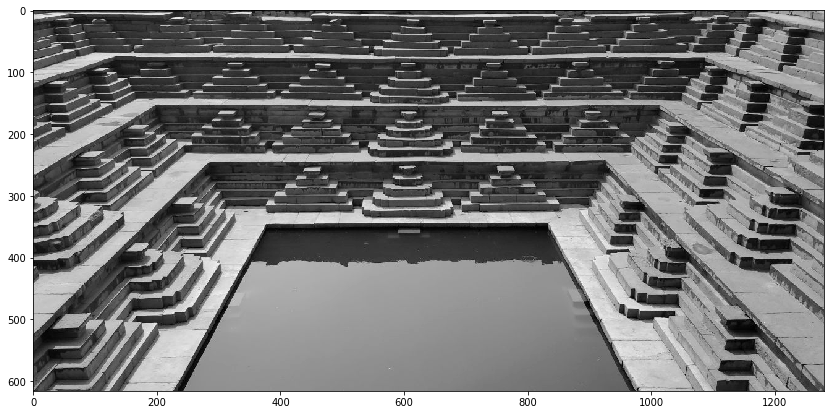

In [17]:
plt.rcParams['figure.figsize'] = [17.0, 7.0]
image = cv2.imread('/Users/mayurjain/Desktop/cv_images/hampi_stairs.jpg')
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray,cmap='gray')

In [18]:
image_gray.shape

(616, 1280)

In [23]:
# Specify the parameters for our HOG descriptor

# Cell Size in pixels (width, height). Must be smaller than the size of the detection window
# and must be chosen so that the resulting Block Size is smaller than the detection window.
cell_size = (6, 6)

# Number of cells per block in each direction (x, y). Must be chosen so that the resulting
# Block Size is smaller than the detection window
num_cells_per_block = (2, 2)

# Block Size in pixels (width, height). Must be an integer multiple of Cell Size.
# The Block Size must be smaller than the detection window
block_size = (num_cells_per_block[0] * cell_size[0],
              num_cells_per_block[1] * cell_size[1])

# Calculate the number of cells that fit in our image in the x and y directions
x_cells = gray_image.shape[1] // cell_size[0]
y_cells = gray_image.shape[0] // cell_size[1]

# Horizontal distance between blocks in units of Cell Size. Must be an integer and it must
# be set such that (x_cells - num_cells_per_block[0]) / h_stride = integer.
h_stride = 1

# Vertical distance between blocks in units of Cell Size. Must be an integer and it must
# be set such that (y_cells - num_cells_per_block[1]) / v_stride = integer.
v_stride = 1

# Block Stride in pixels (horizantal, vertical). Must be an integer multiple of Cell Size
block_stride = (cell_size[0] * h_stride, cell_size[1] * v_stride)

# Number of gradient orientation bins
num_bins = 4      


# Specify the size of the detection window (Region of Interest) in pixels (width, height).
# It must be an integer multiple of Cell Size and it must cover the entire image. Because
# the detection window must be an integer multiple of cell size, depending on the size of
# your cells, the resulting detection window might be slightly smaller than the image.
# This is perfectly ok.
win_size = (x_cells * cell_size[0] , y_cells * cell_size[1])

# Print the shape of the gray scale image for reference
print('\nThe gray scale image has shape: ', gray_image.shape)
print()

# Print the parameters of our HOG descriptor
print('HOG Descriptor Parameters:\n')
print('Window Size:', win_size)
print('Cell Size:', cell_size)
print('Block Size:', block_size)
print('Block Stride:', block_stride)
print('Number of Bins:', num_bins)
print()

# Set the parameters of the HOG descriptor using the variables defined above
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)

# Compute the HOG Descriptor for the gray scale image
hog_descriptor = hog.compute(gray_image)


The gray scale image has shape:  (616, 1280)

HOG Descriptor Parameters:

Window Size: (1278, 612)
Cell Size: (6, 6)
Block Size: (12, 12)
Block Stride: (6, 6)
Number of Bins: 4



In [24]:
# Calculate the total number of blocks along the width of the detection window
tot_bx = np.uint32(((x_cells - num_cells_per_block[0]) / h_stride) + 1)

# Calculate the total number of blocks along the height of the detection window
tot_by = np.uint32(((y_cells - num_cells_per_block[1]) / v_stride) + 1)

# Calculate the total number of elements in the feature vector
tot_els = (tot_bx) * (tot_by) * num_cells_per_block[0] * num_cells_per_block[1] * num_bins

# Print the total number of elements the HOG feature vector should have
print('\nThe total number of elements in the HOG Feature Vector should be: ',
      tot_bx, 'x',
      tot_by, 'x',
      num_cells_per_block[0], 'x',
      num_cells_per_block[1], 'x',
      num_bins, '=',
      tot_els)

# Print the shape of the HOG Descriptor to see that it matches the above
print('\nThe HOG Descriptor has shape:', hog_descriptor.shape)
print()


The total number of elements in the HOG Feature Vector should be:  212 x 101 x 2 x 2 x 4 = 342592

The HOG Descriptor has shape: (342592, 1)



The feature vector has shape: (342592, 1)
The reshaped feature vector has shape: (101, 212, 2, 2, 4)
The average gradient array has shape:  (102, 213, 4)


<IPython.core.display.Javascript object>


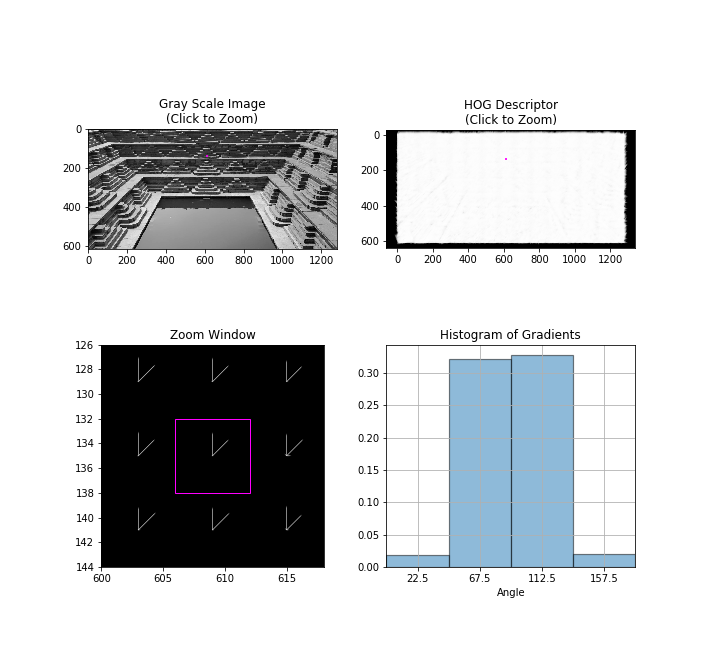

In [26]:
%matplotlib notebook
import matplotlib.patches as patches

# Set the default figure size
plt.rcParams['figure.figsize'] = [9.8, 9]

# Reshape the feature vector to [blocks_y, blocks_x, num_cells_per_block_x, num_cells_per_block_y, num_bins].
# The blocks_x and blocks_y will be transposed so that the first index (blocks_y) referes to the row number
# and the second index to the column number. This will be useful later when we plot the feature vector, so
# that the feature vector indexing matches the image indexing.
hog_descriptor_reshaped = hog_descriptor.reshape(tot_bx,
                                                 tot_by,
                                                 num_cells_per_block[0],
                                                 num_cells_per_block[1],
                                                 num_bins).transpose((1, 0, 2, 3, 4))

# Print the shape of the feature vector for reference
print('The feature vector has shape:', hog_descriptor.shape)

# Print the reshaped feature vector
print('The reshaped feature vector has shape:', hog_descriptor_reshaped.shape)

# Create an array that will hold the average gradients for each cell
ave_grad = np.zeros((y_cells, x_cells, num_bins))

# Print the shape of the ave_grad array for reference
print('The average gradient array has shape: ', ave_grad.shape) 

# Create an array that will count the number of histograms per cell
hist_counter = np.zeros((y_cells, x_cells, 1))

# Add up all the histograms for each cell and count the number of histograms per cell
for i in range (num_cells_per_block[0]):
    for j in range(num_cells_per_block[1]):
        ave_grad[i:tot_by + i,
                 j:tot_bx + j] += hog_descriptor_reshaped[:, :, i, j, :]
        
        hist_counter[i:tot_by + i,
                     j:tot_bx + j] += 1

# Calculate the average gradient for each cell
ave_grad /= hist_counter
   
# Calculate the total number of vectors we have in all the cells.
len_vecs = ave_grad.shape[0] * ave_grad.shape[1] * ave_grad.shape[2]

# Create an array that has num_bins equally spaced between 0 and 180 degress in radians.
deg = np.linspace(0, np.pi, num_bins, endpoint = False)

# Each cell will have a histogram with num_bins. For each cell, plot each bin as a vector (with its magnitude
# equal to the height of the bin in the histogram, and its angle corresponding to the bin in the histogram). 
# To do this, create rank 1 arrays that will hold the (x,y)-coordinate of all the vectors in all the cells in the
# image. Also, create the rank 1 arrays that will hold all the (U,V)-components of all the vectors in all the
# cells in the image. Create the arrays that will hold all the vector positons and components.
U = np.zeros((len_vecs))
V = np.zeros((len_vecs))
X = np.zeros((len_vecs))
Y = np.zeros((len_vecs))

# Set the counter to zero
counter = 0

# Use the cosine and sine functions to calculate the vector components (U,V) from their magnitudes. Remember the 
# cosine and sine functions take angles in radians. Calculate the vector positions and magnitudes from the
# average gradient array
for i in range(ave_grad.shape[0]):
    for j in range(ave_grad.shape[1]):
        for k in range(ave_grad.shape[2]):
            U[counter] = ave_grad[i,j,k] * np.cos(deg[k])
            V[counter] = ave_grad[i,j,k] * np.sin(deg[k])
        
            X[counter] = (cell_size[0] / 2) + (cell_size[0] * i)
            Y[counter] = (cell_size[1] / 2) + (cell_size[1] * j)
        
            counter = counter + 1

# Create the bins in degress to plot our histogram. 
angle_axis = np.linspace(0, 180, num_bins, endpoint = False)
angle_axis += ((angle_axis[1] - angle_axis[0]) / 2)

# Create a figure with 4 subplots arranged in 2 x 2
fig, ((a,b),(c,d)) = plt.subplots(2,2)

# Set the title of each subplot
a.set(title = 'Gray Scale Image\n(Click to Zoom)')
b.set(title = 'HOG Descriptor\n(Click to Zoom)')
c.set(title = 'Zoom Window', xlim = (0, 18), ylim = (0, 18), autoscale_on = False)
d.set(title = 'Histogram of Gradients')

# Plot the gray scale image
a.imshow(gray_image, cmap = 'gray')
a.set_aspect(aspect = 1)

# Plot the feature vector (HOG Descriptor)
b.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
b.invert_yaxis()
b.set_aspect(aspect = 1)
b.set_facecolor('black')

# Define function for interactive zoom
def onpress(event):
    
    #Unless the left mouse button is pressed do nothing
    if event.button != 1:
        return
    
    # Only accept clicks for subplots a and b
    if event.inaxes in [a, b]:
        
        # Get mouse click coordinates
        x, y = event.xdata, event.ydata
        
        # Select the cell closest to the mouse click coordinates
        cell_num_x = np.uint32(x / cell_size[0])
        cell_num_y = np.uint32(y / cell_size[1])
        
        # Set the edge coordinates of the rectangle patch
        edgex = x - (x % cell_size[0])
        edgey = y - (y % cell_size[1])
        
        # Create a rectangle patch that matches the the cell selected above        
        rect = patches.Rectangle((edgex, edgey),
                                  cell_size[0], cell_size[1],
                                  linewidth = 1,
                                  edgecolor = 'magenta',
                                  facecolor='none')
        
        # A single patch can only be used in a single plot. Create copies
        # of the patch to use in the other subplots
        rect2 = copy.copy(rect)
        rect3 = copy.copy(rect)
        
        # Update all subplots
        a.clear()
        a.set(title = 'Gray Scale Image\n(Click to Zoom)')
        a.imshow(gray_image, cmap = 'gray')
        a.set_aspect(aspect = 1)
        a.add_patch(rect)

        b.clear()
        b.set(title = 'HOG Descriptor\n(Click to Zoom)')
        b.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
        b.invert_yaxis()
        b.set_aspect(aspect = 1)
        b.set_facecolor('black')
        b.add_patch(rect2)

        c.clear()
        c.set(title = 'Zoom Window')
        c.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 1)
        c.set_xlim(edgex - cell_size[0], edgex + (2 * cell_size[0]))
        c.set_ylim(edgey - cell_size[1], edgey + (2 * cell_size[1]))
        c.invert_yaxis()
        c.set_aspect(aspect = 1)
        c.set_facecolor('black')
        c.add_patch(rect3)

        d.clear()
        d.set(title = 'Histogram of Gradients')
        d.grid()
        d.set_xlim(0, 180)
        d.set_xticks(angle_axis)
        d.set_xlabel('Angle')
        d.bar(angle_axis,
              ave_grad[cell_num_y, cell_num_x, :],
              180 // num_bins,
              align = 'center',
              alpha = 0.5,
              linewidth = 1.2,
              edgecolor = 'k')

        fig.canvas.draw()

# Create a connection between the figure and the mouse click
fig.canvas.mpl_connect('button_press_event', onpress)
plt.show()

In [5]:
%matplotlib notebook

import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set the default figure size
plt.rcParams['figure.figsize'] = [9.8, 9]


# -------------------------- Select the Image and Specify the parameters for our HOG descriptor --------------------------

# Load the image 
image = cv2.imread('/Users/mayurjain/Desktop/cv_images/flower.jpg')

# Cell Size in pixels (width, height). Must be smaller than the size of the detection window
# and must be chosen so that the resulting Block Size is smaller than the detection window.
cell_size = (16, 16)

# Number of cells per block in each direction (x, y). Must be chosen so that the resulting
# Block Size is smaller than the detection window
num_cells_per_block = (8, 8)

# Number of gradient orientation bins
num_bins = 9

# -------------------------------------------------------------------------------------------------------------------------


# Convert the original image to RGB
original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the original image to gray scale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Block Size in pixels (width, height). Must be an integer multiple of Cell Size.
# The Block Size must be smaller than the detection window
block_size = (num_cells_per_block[0] * cell_size[0],
              num_cells_per_block[1] * cell_size[1])

# Calculate the number of cells that fit in our image in the x and y directions
x_cells = gray_image.shape[1] // cell_size[0]
y_cells = gray_image.shape[0] // cell_size[1]

# Horizontal distance between blocks in units of Cell Size. Must be an integer and it must
# be set such that (x_cells - num_cells_per_block[0]) / h_stride = integer.
h_stride = 3

# Vertical distance between blocks in units of Cell Size. Must be an integer and it must
# be set such that (y_cells - num_cells_per_block[1]) / v_stride = integer.
v_stride = 3

# Block Stride in pixels (horizantal, vertical). Must be an integer multiple of Cell Size
block_stride = (cell_size[0] * h_stride, cell_size[1] * v_stride)

      
# Specify the size of the detection window (Region of Interest) in pixels (width, height).
# It must be an integer multiple of Cell Size and it must cover the entire image. Because
# the detection window must be an integer multiple of cell size, depending on the size of
# your cells, the resulting detection window might be slightly smaller than the image.
# This is perfectly ok.
win_size = (x_cells * cell_size[0] , y_cells * cell_size[1])

# Print the shape of the gray scale image for reference
print('\nThe gray scale image has shape: ', gray_image.shape)
print()

# Print the parameters of our HOG descriptor
print('HOG Descriptor Parameters:\n')
print('Window Size:', win_size)
print('Cell Size:', cell_size)
print('Block Size:', block_size)
print('Block Stride:', block_stride)
print('Number of Bins:', num_bins)
print()

# Set the parameters of the HOG descriptor using the variables defined above
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)

# Compute the HOG Descriptor for the gray scale image
hog_descriptor = hog.compute(gray_image)

# Calculate the total number of blocks along the width of the detection window
tot_bx = np.uint32(((x_cells - num_cells_per_block[0]) / h_stride) + 1)

# Calculate the total number of blocks along the height of the detection window
tot_by = np.uint32(((y_cells - num_cells_per_block[1]) / v_stride) + 1)

# Calculate the total number of elements in the feature vector
tot_els = (tot_bx) * (tot_by) * num_cells_per_block[0] * num_cells_per_block[1] * num_bins


# Reshape the feature vector to [blocks_y, blocks_x, num_cells_per_block_x, num_cells_per_block_y, num_bins].
# The blocks_x and blocks_y will be transposed so that the first index (blocks_y) referes to the row number
# and the second index to the column number. This will be useful later when we plot the feature vector, so
# that the feature vector indexing matches the image indexing.
hog_descriptor_reshaped = hog_descriptor.reshape(tot_bx,
                                                 tot_by,
                                                 num_cells_per_block[0],
                                                 num_cells_per_block[1],
                                                 num_bins).transpose((1, 0, 2, 3, 4))

# Create an array that will hold the average gradients for each cell
ave_grad = np.zeros((y_cells, x_cells, num_bins))

# Create an array that will count the number of histograms per cell
hist_counter = np.zeros((y_cells, x_cells, 1))

# Add up all the histograms for each cell and count the number of histograms per cell
for i in range (num_cells_per_block[0]):
    for j in range(num_cells_per_block[1]):
        ave_grad[i:tot_by + i,
                 j:tot_bx + j] += hog_descriptor_reshaped[:, :, i, j, :]
        
        hist_counter[i:tot_by + i,
                     j:tot_bx + j] += 1

# Calculate the average gradient for each cell
ave_grad /= hist_counter
   
# Calculate the total number of vectors we have in all the cells.
len_vecs = ave_grad.shape[0] * ave_grad.shape[1] * ave_grad.shape[2]

# Create an array that has num_bins equally spaced between 0 and 180 degress in radians.
deg = np.linspace(0, np.pi, num_bins, endpoint = False)

# Each cell will have a histogram with num_bins. For each cell, plot each bin as a vector (with its magnitude
# equal to the height of the bin in the histogram, and its angle corresponding to the bin in the histogram). 
# To do this, create rank 1 arrays that will hold the (x,y)-coordinate of all the vectors in all the cells in the
# image. Also, create the rank 1 arrays that will hold all the (U,V)-components of all the vectors in all the
# cells in the image. Create the arrays that will hold all the vector positons and components.
U = np.zeros((len_vecs))
V = np.zeros((len_vecs))
X = np.zeros((len_vecs))
Y = np.zeros((len_vecs))

# Set the counter to zero
counter = 0

# Use the cosine and sine functions to calculate the vector components (U,V) from their maginitudes. Remember the 
# cosine and sine functions take angles in radians. Calculate the vector positions and magnitudes from the
# average gradient array
for i in range(ave_grad.shape[0]):
    for j in range(ave_grad.shape[1]):
        for k in range(ave_grad.shape[2]):
            U[counter] = ave_grad[i,j,k] * np.cos(deg[k])
            V[counter] = ave_grad[i,j,k] * np.sin(deg[k])
        
            X[counter] = (cell_size[0] / 2) + (cell_size[0] * i)
            Y[counter] = (cell_size[1] / 2) + (cell_size[1] * j)
        
            counter = counter + 1

# Create the bins in degress to plot our histogram. 
angle_axis = np.linspace(0, 180, num_bins, endpoint = False)
angle_axis += ((angle_axis[1] - angle_axis[0]) / 2)

# Create a figure with 4 subplots arranged in 2 x 2
fig, ((a,b),(c,d)) = plt.subplots(2,2)

# Set the title of each subplot
a.set(title = 'Gray Scale Image\n(Click to Zoom)')
b.set(title = 'HOG Descriptor\n(Click to Zoom)')
c.set(title = 'Zoom Window', xlim = (0, 18), ylim = (0, 18), autoscale_on = False)
d.set(title = 'Histogram of Gradients')

# Plot the gray scale image
a.imshow(gray_image, cmap = 'gray')
a.set_aspect(aspect = 1)

# Plot the feature vector (HOG Descriptor)
b.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
b.invert_yaxis()
b.set_aspect(aspect = 1)
b.set_facecolor('black')

# Define function for interactive zoom
def onpress(event):
    
    #Unless the left mouse button is pressed do nothing
    if event.button != 1:
        return
    
    # Only accept clicks for subplots a and b
    if event.inaxes in [a, b]:
        
        # Get mouse click coordinates
        x, y = event.xdata, event.ydata
        
        # Select the cell closest to the mouse click coordinates
        cell_num_x = np.uint32(x / cell_size[0])
        cell_num_y = np.uint32(y / cell_size[1])
        
        # Set the edge coordinates of the rectangle patch
        edgex = x - (x % cell_size[0])
        edgey = y - (y % cell_size[1])
        
        # Create a rectangle patch that matches the the cell selected above        
        rect = patches.Rectangle((edgex, edgey),
                                  cell_size[0], cell_size[1],
                                  linewidth = 1,
                                  edgecolor = 'magenta',
                                  facecolor='none')
        
        # A single patch can only be used in a single plot. Create copies
        # of the patch to use in the other subplots
        rect2 = copy.copy(rect)
        rect3 = copy.copy(rect)
        
        # Update all subplots
        a.clear()
        a.set(title = 'Gray Scale Image\n(Click to Zoom)')
        a.imshow(gray_image, cmap = 'gray')
        a.set_aspect(aspect = 1)
        a.add_patch(rect)

        b.clear()
        b.set(title = 'HOG Descriptor\n(Click to Zoom)')
        b.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
        b.invert_yaxis()
        b.set_aspect(aspect = 1)
        b.set_facecolor('black')
        b.add_patch(rect2)

        c.clear()
        c.set(title = 'Zoom Window')
        c.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 1)
        c.set_xlim(edgex - cell_size[0], edgex + (2 * cell_size[0]))
        c.set_ylim(edgey - cell_size[1], edgey + (2 * cell_size[1]))
        c.invert_yaxis()
        c.set_aspect(aspect = 1)
        c.set_facecolor('black')
        c.add_patch(rect3)

        d.clear()
        d.set(title = 'Histogram of Gradients')
        d.grid()
        d.set_xlim(0, 180)
        d.set_xticks(angle_axis)
        d.set_xlabel('Angle')
        d.bar(angle_axis,
              ave_grad[cell_num_y, cell_num_x, :],
              180 // num_bins,
              align = 'center',
              alpha = 0.5,
              linewidth = 1.2,
              edgecolor = 'k')

        fig.canvas.draw()

# Create a connection between the figure and the mouse click
fig.canvas.mpl_connect('button_press_event', onpress)
plt.show()


The gray scale image has shape:  (1280, 960)

HOG Descriptor Parameters:

Window Size: (960, 1280)
Cell Size: (16, 16)
Block Size: (128, 128)
Block Stride: (48, 48)
Number of Bins: 9



error: OpenCV(4.1.1) /Users/travis/build/skvark/opencv-python/opencv/modules/objdetect/src/hog.cpp:90: error: (-215:Assertion failed) (winSize.width - blockSize.width) % blockStride.width == 0 && (winSize.height - blockSize.height) % blockStride.height == 0 in function 'getDescriptorSize'
